In [204]:
#imports 

import pandas as pd
import os
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style('white')
sns.palplot(sns.color_palette())

%matplotlib inline

In [205]:
# loading the results csv file

csv_path = './results/mnist_attention.csv'
df = pd.read_csv(csv_path)

In [206]:
# overview of the loaded results

df.head()

,Iteration,Accuracy,NMI,ARI,Loss
0,0,0.769,0.582,0.582,0.000
1,140,0.805,0.643,0.643,0.079
2,280,0.818,0.667,0.667,0.124
3,420,0.825,0.683,0.683,0.175
4,560,0.826,0.686,0.686,0.222


In [210]:
def plot_results(dataframe, output_folder, output_file_name, extension='pdf', dpi=1000, plot_type='accuracy'):    
    file_path = os.path.join(output_folder, output_file_name + '.' + extension)
    fig, ax = plt.subplots()
    
    if plot_type == 'accuracy':    
        ax.plot(dataframe.Iteration, dataframe.Accuracy, label='Acc')
        ax.plot(dataframe.Iteration, dataframe.NMI, label='NMI')
        plt.xlabel('Iterations')
        plt.ylabel('Accuracy / NMI')
        plt.title('Unsupervised Learning Accuracy')
    else:
        ax.plot(dataframe.Iteration, dataframe.Loss, label='Loss')
        plt.xlim(500, 20000)
        plt.xlabel('Iterations')
        plt.ylabel('Loss')
        plt.title('Clustering Loss')
    ax.legend()
    plt.show()
    fig.savefig(file_path, dpi=dpi, bbox_inches='tight')
    
    print("Plot saved")

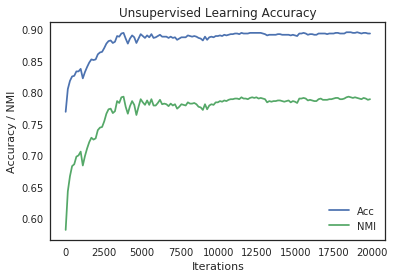

Plot saved


In [211]:
plot_results(df, output_folder='/home/kumarkm/Dropbox/Courses/Data Mining/ReportTemplate_LaTeX/images/', output_file_name='mnist_attention_accuracy')

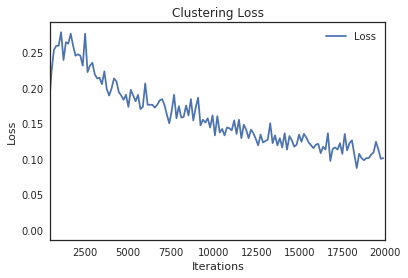

Plot saved


In [212]:
plot_results(df, output_folder='/home/kumarkm/Dropbox/Courses/Data Mining/ReportTemplate_LaTeX/images/', output_file_name='mnist_attention_loss', plot_type='loss')